In [1]:
import pandas as pd

In [2]:
#%pip install openpyxl

In [3]:
stable_lm_all = pd.read_excel("gs://article-validation/stablelm-Evaluation.xlsx")
stable_lm_all.head()

,News,Article No,Prompt,Source,Accuracy,Relevency,Relevency Notes
0,CNBC,1,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1,4.0,It is giving a good summary but it not coverin...
1,CNBC,1,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1,5.0,Very similar to the actual summary. Covering t...
2,CNBC,2,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/scientists-dev...,1,5.0,On point. Perfect summary
3,CNBC,2,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/01/scientists-dev...,1,3.0,Very good but a little repition hence bigger s...
4,CNBC,3,NaN,https://www.cnbc.com/2023/04/30/alzheimers-tre...,NOT RUNNING- MEMORY ERROR,NaN,NaN


In [4]:
stable_lm_all["Accuracy"] = pd.to_numeric(stable_lm_all["Accuracy"], errors='coerce')
stable_lm_all["Relevency"] = pd.to_numeric(stable_lm_all["Relevency"], errors='coerce')
stable_lm_all["Accuracy"] = stable_lm_all["Accuracy"].fillna(0)
stable_lm_all["Relevency"] = stable_lm_all["Relevency"].fillna(1)
stable_lm_all.head()

,News,Article No,Prompt,Source,Accuracy,Relevency,Relevency Notes
0,CNBC,1,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1.0,4.0,It is giving a good summary but it not coverin...
1,CNBC,1,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1.0,5.0,Very similar to the actual summary. Covering t...
2,CNBC,2,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/scientists-dev...,1.0,5.0,On point. Perfect summary
3,CNBC,2,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/01/scientists-dev...,1.0,3.0,Very good but a little repition hence bigger s...
4,CNBC,3,NaN,https://www.cnbc.com/2023/04/30/alzheimers-tre...,0.0,1.0,NaN


In [5]:
stable_lm_best = stable_lm_all.groupby(["News", "Article No"]).agg({"Accuracy": "max", "Relevency": "max"})
stable_lm_best.head()

Accuracy  Relevency
News Article No                     
CNBC 1                1.0        5.0
     2                1.0        5.0
     3                0.0        1.0
     4                1.0        4.0
     5                1.0        3.0

In [6]:
stable_lm_best = stable_lm_best.reset_index()[["Accuracy", "Relevency"]].copy()
stable_lm_best["Model"] = "StableLM"

stable_lm_best.head()

,Accuracy,Relevency,Model
0,1.0,5.0,StableLM
1,1.0,5.0,StableLM
2,0.0,1.0,StableLM
3,1.0,4.0,StableLM
4,1.0,3.0,StableLM


In [7]:
t5_cnbc = pd.read_csv("gs://article-validation/manual/cnbc-t5-score.csv")
t5_reuter = pd.read_csv("gs://article-validation/manual/reuter-t5-score.csv")
t5_wsj = pd.read_csv("gs://article-validation/manual/wsj-t5-score.csv")

t5_all = pd.concat([t5_cnbc, t5_reuter, t5_wsj])
t5_all.head()

,Source,Accuracy,Relevancy,Summary,Comment
0,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1,4,Pfizer reported first-quarter revenue and adju...,Did not go into detail about the specific merg...
1,https://www.cnbc.com/2023/05/01/scientists-dev...,1,4,Scientists at the University of Texas at Austi...,Did not mention that the system is only in lab...
2,https://www.cnbc.com/2023/04/30/alzheimers-tre...,1,1,The U.S. health-care system is not currently p...,Ran out of context window
3,https://www.cnbc.com/2023/05/02/gilead-governm...,1,5,The U.S. government is suing Gilead Sciences f...,Covers the lawsuit and background information ...
4,https://www.cnbc.com/2023/05/01/states-medicar...,0,3,Democratic and Republican attorneys general fr...,Covers too much of the political and rationale...


In [8]:
t5_all_best = t5_all[["Accuracy", "Relevancy"]].copy()
t5_all_best["Model"] = "T5"
t5_all_best.head()

,Accuracy,Relevancy,Model
0,1,4,T5
1,1,4,T5
2,1,1,T5
3,1,5,T5
4,0,3,T5


In [9]:
stable_lm_best = stable_lm_best.rename(columns={"Relevency": "Relevancy"})
stable_lm_best.head()

,Accuracy,Relevancy,Model
0,1.0,5.0,StableLM
1,1.0,5.0,StableLM
2,0.0,1.0,StableLM
3,1.0,4.0,StableLM
4,1.0,3.0,StableLM


In [10]:
vicuna_best = pd.read_excel("gs://article-validation/stablelm_vicunaEvaluation.xlsx", sheet_name="Vicuna ")
vicuna_best.head()

,News,Article No,Prompt,Source,Accuracy,Relevency
0,CNBC,1,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1,4.0
1,CNBC,2,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/scientists-dev...,1,3.0
2,CNBC,3,NaN,https://www.cnbc.com/2023/04/30/alzheimers-tre...,NOT RUNNING- MEMORY ERROR,NaN
3,CNBC,4,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/02/gilead-governm...,1,4.0
4,CNBC,5,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/states-medicar...,1,4.0


In [11]:
vicuna_best["Accuracy"] = pd.to_numeric(vicuna_best["Accuracy"], errors='coerce')
vicuna_best["Relevency"] = pd.to_numeric(vicuna_best["Relevency"], errors='coerce')
vicuna_best["Accuracy"] = vicuna_best["Accuracy"].fillna(0)
vicuna_best["Relevency"] = vicuna_best["Relevency"].fillna(1)
vicuna_best.head()

,News,Article No,Prompt,Source,Accuracy,Relevency
0,CNBC,1,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1.0,4.0
1,CNBC,2,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/scientists-dev...,1.0,3.0
2,CNBC,3,NaN,https://www.cnbc.com/2023/04/30/alzheimers-tre...,0.0,1.0
3,CNBC,4,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/02/gilead-governm...,1.0,4.0
4,CNBC,5,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/states-medicar...,1.0,4.0


In [12]:
vicuna_agg = vicuna_best.groupby(["News", "Article No"]).agg({"Accuracy": "max", "Relevency": "max"})
vicuna_agg.head()

Accuracy  Relevency
News Article No                     
CNBC 1                1.0        4.0
     2                1.0        3.0
     3                0.0        1.0
     4                1.0        4.0
     5                1.0        4.0

In [13]:
vicuna_agg = vicuna_agg.reset_index()[["Accuracy", "Relevency"]].copy()
vicuna_agg["Model"] = "Vicuna"

vicuna_agg.head()

,Accuracy,Relevency,Model
0,1.0,4.0,Vicuna
1,1.0,3.0,Vicuna
2,0.0,1.0,Vicuna
3,1.0,4.0,Vicuna
4,1.0,4.0,Vicuna


In [14]:
vicuna_agg = vicuna_agg.rename(columns={"Relevency": "Relevancy"})
vicuna_agg.head()

,Accuracy,Relevancy,Model
0,1.0,4.0,Vicuna
1,1.0,3.0,Vicuna
2,0.0,1.0,Vicuna
3,1.0,4.0,Vicuna
4,1.0,4.0,Vicuna


In [15]:
koala_df = pd.read_excel("gs://article-validation/Koala-Evaluation.xlsx")
koala_df.head()

,News,Article No,Prompt,Source,Accuracy,Relevency
0,CNBC,1,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1.0,3
1,CNBC,2,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/scientists-dev...,0.7,3
2,CNBC,3,NaN,https://www.cnbc.com/2023/04/30/alzheimers-tre...,0.0,0
3,CNBC,4,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/gilead-governm...,1.0,5
4,CNBC,5,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/01/states-medicar...,1.0,5


In [16]:
koala_agg = koala_df[["Accuracy", "Relevency"]]
koala_agg = koala_agg.rename(columns={"Relevency": "Relevancy"})
koala_agg["Model"] = "Koala"
koala_agg.head()

,Accuracy,Relevancy,Model
0,1.0,3,Koala
1,0.7,3,Koala
2,0.0,0,Koala
3,1.0,5,Koala
4,1.0,5,Koala


In [17]:
all_scores = pd.concat([t5_all_best, stable_lm_best, vicuna_agg, koala_agg])
all_scores.head()

,Accuracy,Relevancy,Model
0,1.0,4.0,T5
1,1.0,4.0,T5
2,1.0,1.0,T5
3,1.0,5.0,T5
4,0.0,3.0,T5


In [18]:
import seaborn as sns
from matplotlib import pyplot as plt


all_scores.groupby("Model").agg({"Accuracy": "mean"})

,Accuracy
Model,
Koala,0.913333
StableLM,0.800000
T5,0.888889
Vicuna,0.933333


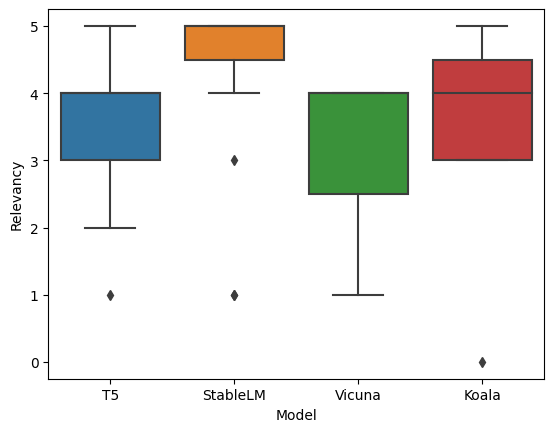

In [19]:
sns.boxplot(x="Model", y="Relevancy", data=all_scores)
plt.show()

In [27]:
stable_lm_best

,Accuracy,Relevancy,Model
0,1.0,5.0,StableLM
1,1.0,5.0,StableLM
2,0.0,1.0,StableLM
3,1.0,4.0,StableLM
4,1.0,3.0,StableLM
5,1.0,5.0,StableLM
6,1.0,5.0,StableLM
7,1.0,5.0,StableLM
8,0.0,1.0,StableLM
9,1.0,5.0,StableLM


In [28]:
stable_lm_all = pd.read_excel("gs://article-validation/stablelm-Evaluation.xlsx")
stable_lm_all["Accuracy"] = pd.to_numeric(stable_lm_all["Accuracy"], errors='coerce')
stable_lm_all["Relevency"] = pd.to_numeric(stable_lm_all["Relevency"], errors='coerce')
stable_lm_all["Accuracy"] = stable_lm_all["Accuracy"].fillna(0)
stable_lm_all["Relevency"] = stable_lm_all["Relevency"].fillna(1)
stable_lm_all.head()

,News,Article No,Prompt,Source,Accuracy,Relevency,Relevency Notes
0,CNBC,1,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1.0,4.0,It is giving a good summary but it not coverin...
1,CNBC,1,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1.0,5.0,Very similar to the actual summary. Covering t...
2,CNBC,2,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/01/scientists-dev...,1.0,5.0,On point. Perfect summary
3,CNBC,2,You are an equity researcher specialized in th...,https://www.cnbc.com/2023/05/01/scientists-dev...,1.0,3.0,Very good but a little repition hence bigger s...
4,CNBC,3,NaN,https://www.cnbc.com/2023/04/30/alzheimers-tre...,0.0,1.0,NaN


In [29]:
stable_lm_all.loc[stable_lm_all.Relevency == 4]

,News,Article No,Prompt,Source,Accuracy,Relevency,Relevency Notes
0,CNBC,1,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/pfizer-pfe-q1-...,1.0,4.0,It is giving a good summary but it not coverin...
5,CNBC,4,Write a summary of the following article focus...,https://www.cnbc.com/2023/05/02/gilead-governm...,1.0,4.0,very good but 1point is missing
17,Reuters,5,Write a summary of the following article focus...,https://www.reuters.com/business/healthcare-ph...,1.0,4.0,NaN
28,WSJ,5,You are an equity researcher specialized in th...,https://www.wsj.com/articles/medical-device-ma...,0.0,4.0,NaN


In [31]:
koala_df = pd.read_excel("gs://article-validation/Koala-Evaluation.xlsx")
koala_df.loc[koala_df.Relevency == 4]

,News,Article No,Prompt,Source,Accuracy,Relevency
7,Reuters,3,Write a summary of the following article focus...,https://www.reuters.com/business/healthcare-ph...,1.0,4
11,WSJ,2,Write a summary of the following article focus...,https://www.wsj.com/articles/kidney-care-speci...,1.0,4
12,WSJ,3,You are an equity researcher specialized in th...,https://www.wsj.com/articles/healthcare-lender...,1.0,4
14,WSJ,5,You are an equity researcher specialized in th...,https://www.wsj.com/articles/medical-device-ma...,1.0,4


In [34]:
koala_df.loc[koala_df.Relevency == 4].iloc[3]["Source"]

'https://www.wsj.com/articles/medical-device-makers-gain-amid-return-to-normalcy-5d8ee35c'